In [19]:
#1 Import library
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [20]:
#2 Import dataset
df = pd.read_excel('source/HC by Education.xlsx', usecols=['Education', 'Date', 'Total HC'])
df['Year'] = pd.DatetimeIndex(df['Date']).year
df.head(10)

,Education,Date,Total HC,Year
0,Doctorate,1981-12-01,6,1981
1,Master,1981-12-01,18,1981
2,Bachelor,1981-12-01,3803,1981
3,Diploma,1981-12-01,2429,1981
4,SeniorHS,1981-12-01,922,1981
5,JuniorHS,1981-12-01,181,1981
6,Elementary,1981-12-01,98,1981
7,Doctorate,1982-12-01,7,1982
8,Master,1982-12-01,17,1982
9,Bachelor,1982-12-01,3908,1982


In [21]:
#3 Sorting dataset
current_year = 2019
dff = (df[df['Year'].eq(current_year)]
       .sort_values(by='Total HC', ascending=True))
dff

,Education,Date,Total HC,Year
272,Elementary,2019-12-01,15,2019
266,Doctorate,2019-12-01,19,2019
267,Master,2019-12-01,33,2019
271,JuniorHS,2019-12-01,37,2019
270,SeniorHS,2019-12-01,117,2019
269,Diploma,2019-12-01,2753,2019
268,Bachelor,2019-12-01,5807,2019


<BarContainer object of 7 artists>

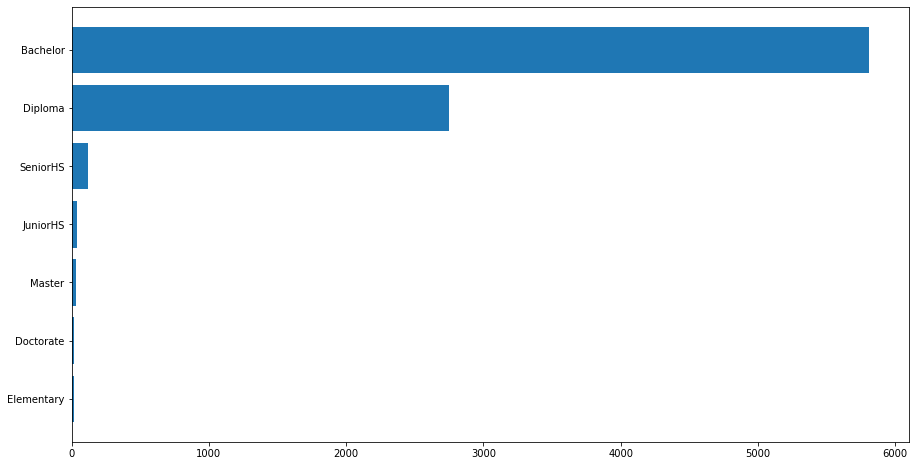

In [22]:
#4 Visualize data with basic bar charts
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['Education'], dff['Total HC'])

In [23]:
#5 Create a color dictionary for educational bars
colors = dict(zip(
    ['Doctorate', 'Master', 'Bachelor', 'Diploma',
     'SeniorHS', 'JuniorHS', 'Elementary'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f', '#eafb50']
))

Text(1, 0.4, '2019')

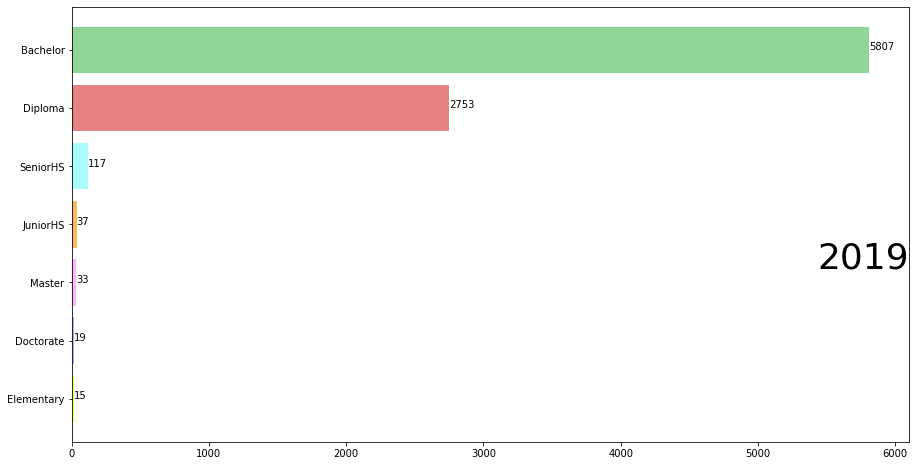

In [25]:
#6 Visualize data with colored bar charts
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   # flip values from top to bottom
# pass colors values to `color=`
ax.barh(dff['Education'], dff['Total HC'], color=[colors[x] for x in dff['Education']])
for i, (value, name) in enumerate(zip(dff['Total HC'], dff['Education'])):
    ax.text(value, i,     value,           ha='left')
# Add year right middle portion of canvas
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=36, ha='right')

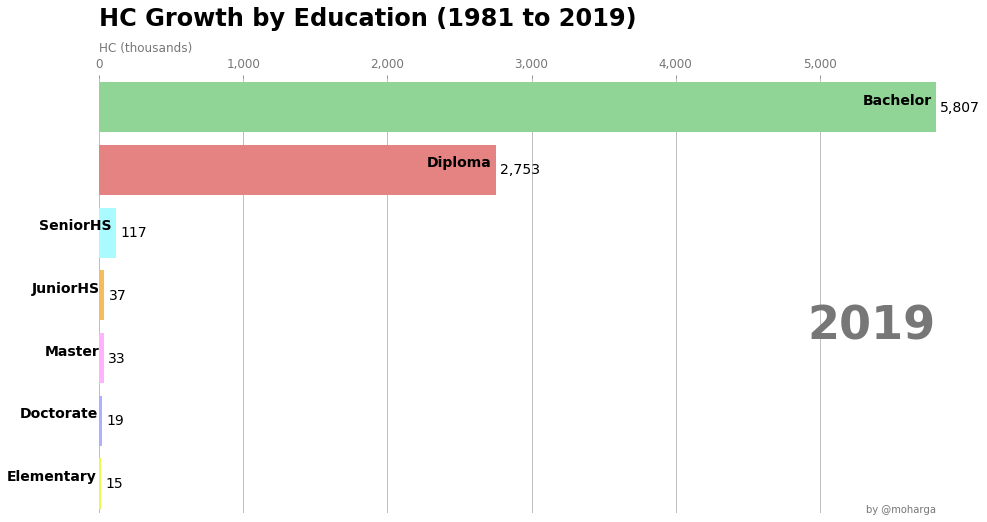

In [26]:
#7 Create a function to visualize colored bar charts with details
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(year):
    dff = df[df['Year'].eq(year)].sort_values(by='Total HC', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['Education'], dff['Total HC'], color=[colors[x] for x in dff['Education']])
    dx = dff['Total HC'].max() / 200
    for i, (value, name) in enumerate(zip(dff['Total HC'], dff['Education'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'HC (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'HC Growth by Education (1981 to 2019)',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @moharga', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2019)

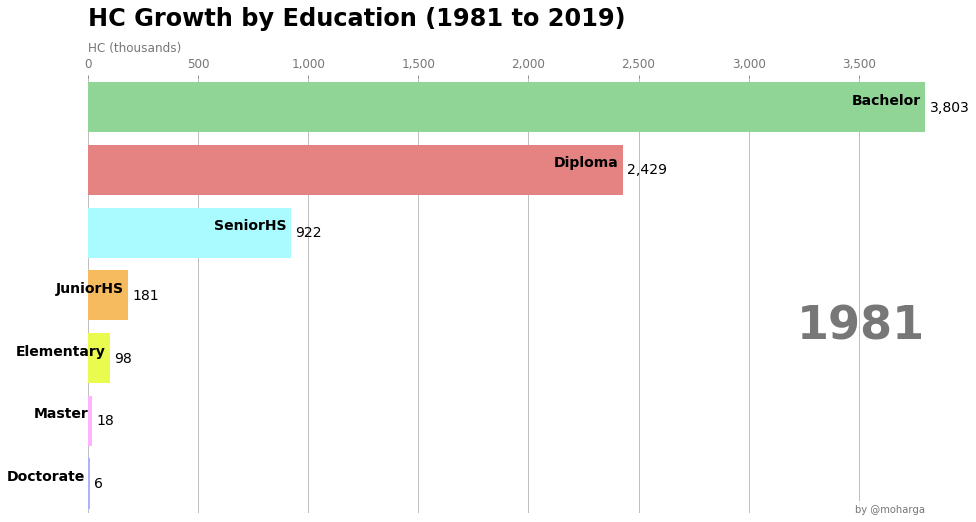

In [27]:
#8 Visualize data with bar charts race (if the animated bar chart race doesn't work, download the file and open it with your jupyter notebook)
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1981, 2020))
HTML(animator.to_jshtml()) 